In [44]:
import numpy as np
import math
from scipy.special import comb
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Aula 17

1) Faça uma simulação do modelo de mudança extrema com $N = 10$ e $S_{0}^{\lambda} = 0$. Descreva como o valor de $\lambda$ afeta o comportamento das trajetórias da cadeia e de $p^{\lambda}$, onde:

$$
p^{\lambda} = \lim_{m \rightarrow \infty} \dfrac{1}{m}\sum_{i = 1}^{m} S_{i}^{\lambda}
$$

In [64]:
def O_n(y, z, N):
    PO1_n = (np.exp(y * np.sign(z)) ) / ( np.exp(y * np.sign(z)) + np.exp(-1 * y * np.sign(z)))
    if (np.random.rand() <= PO1_n):
        if (z == N):
            return 0
        else:
            return 1
    else:
        if (z == -N):
            return 0
        else:
            return -1

In [65]:
def simu(S, N, Z, n_max, y):
    S_n = [0]
    for n in range(n_max):
        S += O_n(y, S, N)
        S_n.append(S)
    return S_n

In [4]:
N = 10
Z = [num - N for num in range(2*N + 1)]
S = 0
n_max = 10000

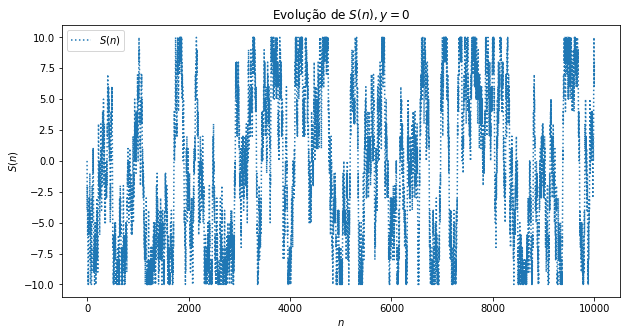

In [109]:
S_n = simu(S, N, Z, n_max, 0)
    
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(n_max + 1), S_n, label='$S(n)$', linestyle='dotted')
ax.set_title('Evolução de $S(n), y = 0$')
plt.xlabel('$n$')
plt.ylabel('$S(n)$')
ax.legend();

In [110]:
np.mean(S_n)

-0.6905309469053095

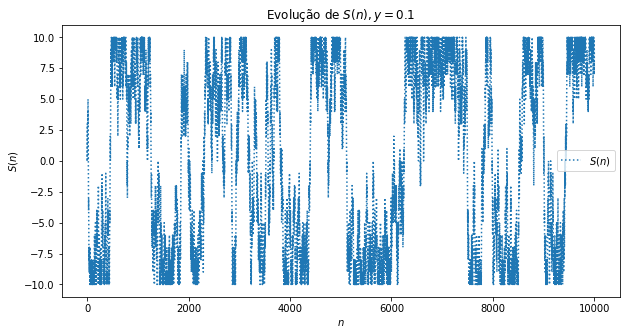

In [111]:
S_n = simu(S, N, Z, n_max, 0.1)
    
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(n_max + 1), S_n, label='$S(n)$', linestyle='dotted')
ax.set_title('Evolução de $S(n), y = 0.1$')
plt.xlabel('$n$')
plt.ylabel('$S(n)$')
ax.legend();

In [112]:
np.mean(S_n)

0.3615638436156384

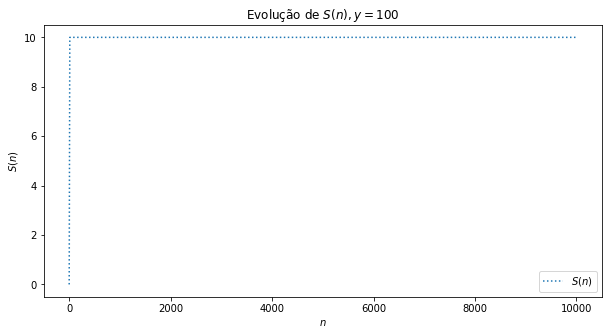

In [113]:
S_n = simu(S, N, Z, n_max, 100)
    
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(n_max + 1), S_n, label='$S(n)$', linestyle='dotted')
ax.set_title('Evolução de $S(n), y = 100$')
plt.xlabel('$n$')
plt.ylabel('$S(n)$')
ax.legend();

In [114]:
np.mean(S_n)

9.994500549945005

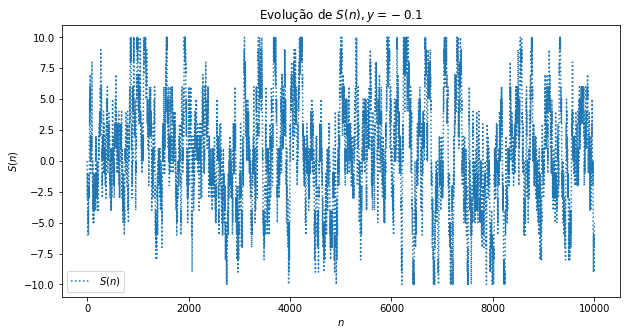

In [115]:
S_n = simu(S, N, Z, n_max, -0.1)
    
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(n_max + 1), S_n, label='$S(n)$', linestyle='dotted')
ax.set_title('Evolução de $S(n), y = -0.1$')
plt.xlabel('$n$')
plt.ylabel('$S(n)$')
ax.legend();

In [116]:
np.mean(S_n)

0.6763323667633236

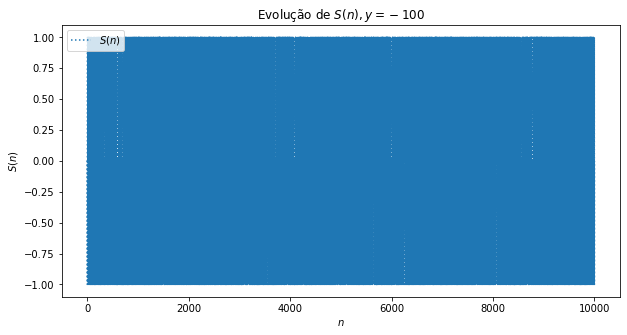

In [117]:
S_n = simu(S, N, Z, n_max, -100)
    
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(n_max + 1), S_n, label='$S(n)$', linestyle='dotted')
ax.set_title('Evolução de $S(n), y = -100$')
plt.xlabel('$n$')
plt.ylabel('$S(n)$')
ax.legend();

In [118]:
np.mean(S_n)

-0.007999200079992

2) Quais são as diferenças observadas na evolução da caideia $(S_{n}^{\lambda})_{n \geq 0}$ nos casos em que $\lambda = 0$, $\lambda \rightarrow - \infty$, e $\lambda \rightarrow + \infty$?

OK

3) O modelo d emudança extrema nos ajuda a entender o comportamento da rede com pressão social. Faça uma simulação e use suas observações para entender as diferenças entre os casos emm que o coeficiente de polarização $\beta = 0$, $\beta \sim 0$ ou $\beta \rightarrow \infty$.

In [5]:
def An_press(beta, U, N, A):
    Pa = [( (np.exp(beta*U[i])) + (np.exp(-beta*U[i])))/(sum([ np.exp(beta*U[j]) + np.exp(-beta*U[j]) 
                                                              for j in range(N)])) for i in range(N)]
    return np.random.choice(A, 1, p=Pa)[0]

In [6]:
def On_press(beta, U, a):
    
    PO1_n = (np.exp(beta * U[a]) / ( np.exp(beta * U[a]) + np.exp(-1 * beta * U[a])))
    
    if (np.random.rand() <= PO1_n):
        return 1
    else:
        return -1

In [7]:
def simu(U, A, N, n_max, beta):
    U_hist = [[u for u in U]]
    U_n = U_hist[0]
    for n in range(n_max):
        An = An_press(beta, U_n, N, A)
        On = On_press(beta, U_n, An)
        U_n = [u + On for u in U_n]
        U_n[An] = 0
        
        U_hist.append(U_n)
    return U_hist

In [2]:
import random

In [60]:
%matplotlib notebook

In [48]:
N = 10
A = [a for a in range(N)]
U = [random.randrange(-1,2,1) for i in range(N)]

In [68]:
U_hist = simu(U, A, N, 1000, 10)

<IPython.core.display.Javascript object>


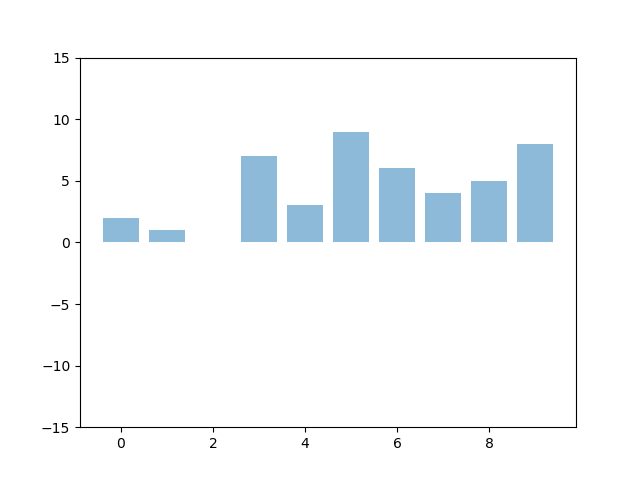

In [69]:
fig, ax = plt.subplots()
ax.set_ylim([-15,15])
ax.set_title('Evolução de $U_n$')
ax.set_xlabel('$N$')
ax.set_ylabel('Pressao')

bar = ax.bar(A, U_hist[0], align='center', alpha=0.5)

def animate(i):
    ax.clear()
    ax.set_ylim([-15,15])
    bar = ax.bar(A, U_hist[i], align='center', alpha=0.5)
    return bar

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)

plt.show()

### Aula 18

1) Escreva um código para simular a sequência do desafio $G_N$, de grafos $G(N,p)$ com $p \in (0,1)$ fixado. Use esse código para simular os grafos e tentar identificar o limite $\lim_{n \rightarrow \infty}\hat{p}_{N}$

$\hat{p}_N = \dfrac{\mathcal{N}_{M}(1)}{\binom{N}{2}}$

In [ ]:
p = np.random.rand()

In [60]:
M = np.zeros((2,2))
for i in range(len(M)):
    for j in range(i, len(M[0])):
        if (np.random.rand() < p and i != j):
            M[i][j] = 1
            M[j][i] = 1

N_M1 = np.count_nonzero(M) / 2
P_N = [N_M1 / comb(2, 2)]
            
for N in range(3, 50):
    M_n = np.zeros((N, N))
    M_n[0:N-1, 0:N-1] += M
    
    for i in range(len(M_n) - 1):
        if (np.random.rand() < p):
            j = len(M_n[i]) - 1
            M_n[i][j] = 1
            M_n[j][i] = 1
            
    N_M1 = np.count_nonzero(M_n) / 2
    
    P_N.append(N_M1 / comb(N,2))
    
    M = M_n

In [61]:
P_N

[1.0,
 0.6666666666666666,
 0.5,
 0.4,
 0.4666666666666667,
 0.5714285714285714,
 0.5714285714285714,
 0.5833333333333334,
 0.5777777777777777,
 0.5818181818181818,
 0.5454545454545454,
 0.5384615384615384,
 0.5384615384615384,
 0.5619047619047619,
 0.5333333333333333,
 0.5220588235294118,
 0.5098039215686274,
 0.52046783625731,
 0.5210526315789473,
 0.5380952380952381,
 0.5411255411255411,
 0.541501976284585,
 0.5471014492753623,
 0.5433333333333333,
 0.5476923076923077,
 0.5612535612535613,
 0.5555555555555556,
 0.5541871921182266,
 0.5517241379310345,
 0.556989247311828,
 0.5564516129032258,
 0.5568181818181818,
 0.5543672014260249,
 0.5546218487394958,
 0.5571428571428572,
 0.56006006006006,
 0.561877667140825,
 0.5560053981106613,
 0.5538461538461539,
 0.5548780487804879,
 0.5551684088269454,
 0.5592469545957918,
 0.5676532769556025,
 0.5626262626262626,
 0.561352657004831,
 0.5596669750231268,
 0.5585106382978723,
 0.5612244897959183]

In [62]:
p

0.5569729939644937

Aparentemente $\hat{p}_N$ converge para $p$

2) Considere o modelo simples de mudança extrema com $N = 10$. Faça três diferentes simulações com $10000$ instantes e $\lambda = -\textit{ln}(2)$, $\lambda = \textit{ln}(2)$, $\lambda = 0.1$, $\lambda = -0.1$ e $\lambda = 0$. Usando as evoluções assim simuladas, estime a proporção de tempo que o processo passa em cada um dos valores de $\mathcal{Z}_{N}$.

Também usando as mesmas simulações , com os mesmos valores de $\lambda$, estime o tempo médio em que o processo leva para atingir o valor $z$ saindo de $z$, nos casos em que $z = 0$, $z = 5$ e $z = 10$.

In [66]:
N = 10
Z = [num - N for num in range(2*N + 1)]
S = 0
n_max = 10000

In [70]:
S1 = simu(S, N, Z, n_max, -np.log(2))
S2 = simu(S, N, Z, n_max, np.log(2))
S3 = simu(S, N, Z, n_max, 0.1)
S4 = simu(S, N, Z, n_max, -0.1)
S5 = simu(S, N, Z, n_max, 0)

In [98]:
def retorno_medio(S):
    Tz = []

    TFlag = False
    TzCount = 0
    
    for z in [0,5,10]:
        for s in S:
            if (s == z and not TFlag):
                TFlag = True

            elif (s == z and TFlag):
                TFlag = False
                Tz.append(TzCount)
                TzCount = 0

            elif (s != z and TFlag):
                TzCount += 1
        
        if (len(Tz) > 0):
            print('z =', z, ' Tz =', np.mean(Tz))
        else:
            print('0 retornos em z =', z)
            
        Tz = []

        TFlag = False
        TzCount = 0

No caso S1: $\lambda = -ln(2) \sim -0.69$

In [74]:
unique, counts = np.unique(S1, return_counts=True)
dict(zip(unique, counts / n_max))

{-6: 0.0002,
 -5: 0.0009,
 -4: 0.0035,
 -3: 0.0142,
 -2: 0.056,
 -1: 0.2315,
 0: 0.3804,
 1: 0.2396,
 2: 0.0571,
 3: 0.0126,
 4: 0.0024,
 5: 0.001,
 6: 0.0004,
 7: 0.0002,
 8: 0.0001}

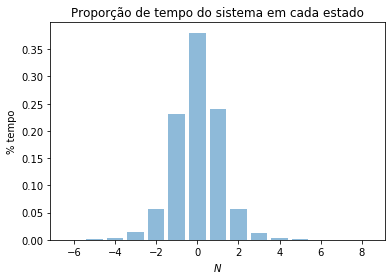

In [77]:
fig, ax = plt.subplots()
ax.set_title('Proporção de tempo do sistema em cada estado')
ax.set_xlabel('$N$')
ax.set_ylabel('% tempo')

bar = ax.bar(unique, counts / n_max, align='center', alpha=0.5)

plt.show()

In [99]:
retorno_medio(S1)

z = 0  Tz = 1.662460567823344
z = 5  Tz = 1239.4
0 retornos em z = 10


No caso S2: $\lambda = ln(2) \sim 0.69$

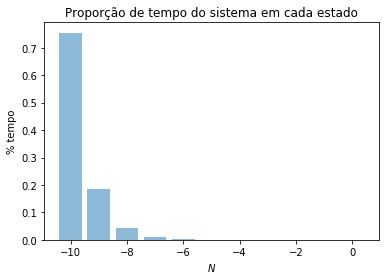

In [78]:
unique, counts = np.unique(S2, return_counts=True)
dict(zip(unique, counts / n_max))

fig, ax = plt.subplots()
ax.set_title('Proporção de tempo do sistema em cada estado')
ax.set_xlabel('$N$')
ax.set_ylabel('% tempo')

bar = ax.bar(unique, counts / n_max, align='center', alpha=0.5)

plt.show()

In [100]:
retorno_medio(S2)

0 retornos em z = 0
0 retornos em z = 5
0 retornos em z = 10


No caso S3: $\lambda = 0.1$

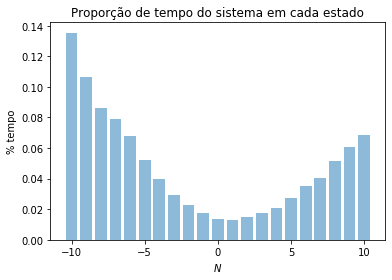

In [79]:
unique, counts = np.unique(S3, return_counts=True)
dict(zip(unique, counts / n_max))

fig, ax = plt.subplots()
ax.set_title('Proporção de tempo do sistema em cada estado')
ax.set_xlabel('$N$')
ax.set_ylabel('% tempo')

bar = ax.bar(unique, counts / n_max, align='center', alpha=0.5)

plt.show()

In [101]:
retorno_medio(S3)

z = 0  Tz = 65.20289855072464
z = 5  Tz = 42.81021897810219
z = 10  Tz = 14.351906158357771


No caso S4: $\lambda = -0.1$

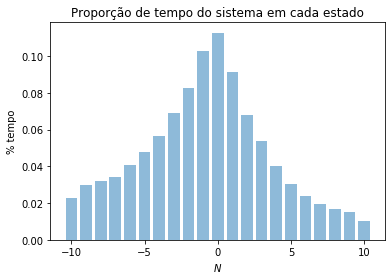

In [80]:
unique, counts = np.unique(S4, return_counts=True)
dict(zip(unique, counts / n_max))

fig, ax = plt.subplots()
ax.set_title('Proporção de tempo do sistema em cada estado')
ax.set_xlabel('$N$')
ax.set_ylabel('% tempo')

bar = ax.bar(unique, counts / n_max, align='center', alpha=0.5)

plt.show()

In [102]:
retorno_medio(S4)

z = 0  Tz = 7.451154529307282
z = 5  Tz = 23.00662251655629
z = 10  Tz = 117.46153846153847


No caso S5: $\lambda = 0$

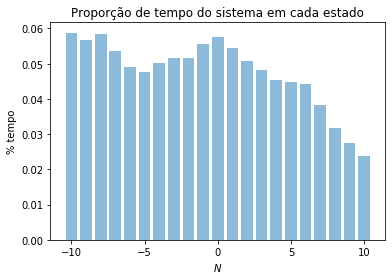

In [81]:
unique, counts = np.unique(S5, return_counts=True)
dict(zip(unique, counts / n_max))

fig, ax = plt.subplots()
ax.set_title('Proporção de tempo do sistema em cada estado')
ax.set_xlabel('$N$')
ax.set_ylabel('% tempo')

bar = ax.bar(unique, counts / n_max, align='center', alpha=0.5)

plt.show()

In [103]:
retorno_medio(S5)

z = 0  Tz = 14.114583333333334
z = 5  Tz = 24.303571428571427
z = 10  Tz = 39.51260504201681
